<a href="https://colab.research.google.com/github/saurabhshaw/neurotechLearningResources/blob/main/Module_4_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Module 4: Assignment**

Welcome to the assignment for Module 4! In this assignment, we will be preprocessing and analyzing two electroencephalographic (EEG) datasets collected from someone with their eyes open and closed.

**Notes about the assignment**:


1.   Google Colab is a fully-contained computing environment. Any libraries, tools, etc. that we use in this notebook will not be downloaded to your computer locally.
2.   You will need to make some additions to the code blocks below. If you have no coding experience, don't worry! The instructions will indicate when, where, and how to do so.
3.   Closing this environment and coming back to it later will "restart" the environment and required you to re-upload and re-run all setup processes.
4.   Note that any changes you make to this file will not be saved to the master file. If you would like to save the changes you made, please save a copy to your google drive from the menu above.

---

# 1. Setup

We will use the MNE neuroimaging analysis package that is commonly used for EEG/MEG data analysis.

To use the MNE toolbox, we will install the package using pip as follows:

In [ ]:
!pip install mne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 14.0 MB/s eta 0:00:00


# **2. Preprocessing the Data**

We shall start by loading the EEG data into the workspace. Download the following raw data files from the LMS and upload them below:

*   *allData_Open.csv* - EEG data collected while the participant's eyes were open
*   *allData_Closed.csv* - EEG data collected while the participant's eyes were closed

In [ ]:
from google.colab import files
uploaded = files.upload()

### **2.1 Read the data into MNE raw format**:
The first step of the preprocessing pipeline reads in the data into the format that MNE uses to store raw data.

In [ ]:
import numpy as np
import mne

# Load the EEG data from the period with the eyes closed:
dataSave_filename = 'OneDrive - The University of Western Ontario/NTMC_Videos/20230703_NeurotechMC3Mod4_Gifs/eyesClosed/allData_Closed.csv'
data = np.genfromtxt(dataSave_filename, delimiter=',', dtype = float)
data = data[1:,1:-3]

# Set the EEG acquisition parameters:
fs = 2048
ch_names = ["Fp1","Fp2","F7","F3","Fz","F4","F8","FC3","FCz","FC4","T7","C3","Cz","C4","T8","CP3","Pz","CP4","M1","M2","P7","PO3","POz","PO4","P8","O1","Oz","O2"]
ch_toKeep = [0,1,3,4,5,6,7,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
data = data[:,ch_toKeep]

# Initialize MNE raw data format:
ch_types = ["eeg"]*data.shape[1]
montage = mne.channels.make_standard_montage("standard_1020")
info = mne.create_info(ch_names=ch_names, sfreq=fs, ch_types=ch_types)
samples = data.T*1e-6
loadedRaw = mne.io.RawArray(samples, info)
loadedRaw.set_montage(montage = montage)

Creating RawArray with float64 data, n_channels=28, n_times=67584
    Range : 0 ... 67583 =      0.000 ...    33.000 secs
Ready.


<RawArray | 28 x 67584 (33.0 s), ~14.5 MB, data loaded>

Let us plot the raw data to see what it looks like. You will notice that the data is very noisy and it is hard to see any discernable features.

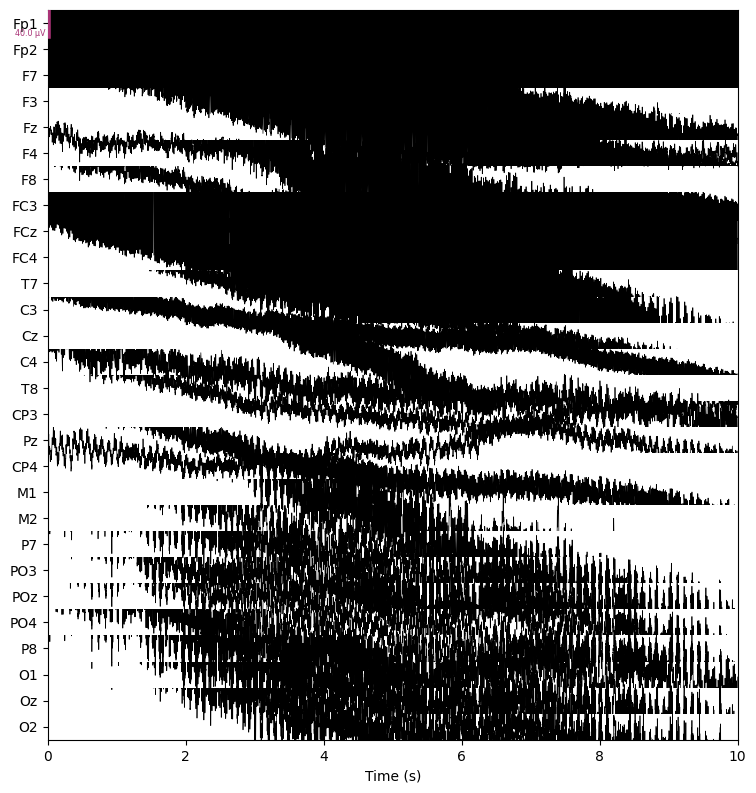

Done


In [ ]:
# Plot raw data:
loadedRaw.plot(n_channels = len(ch_toKeep), show_scrollbars=False)
print("Done")

Next, let us plot the power spectral density (PSD) of the raw data to appreciate the different amounts of each frequency component present in the data. Notice the sharp peak at 60Hz that corresponds to electrical line noise in North America, and the smaller peak at ~10Hz that corresponds to the alpha brain activity expected in a participant with their eyes closed. Notice how the alpha activity is predominanty seen in the electrodes at the back of the head (purple electrodes), since that is the region of the brain responsible for processing visual input.

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 1.000 (s)
Done


/Users/saurabh/opt/anaconda3/envs/CNX_UXRI/lib/python3.9/site-packages/mne/viz/utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


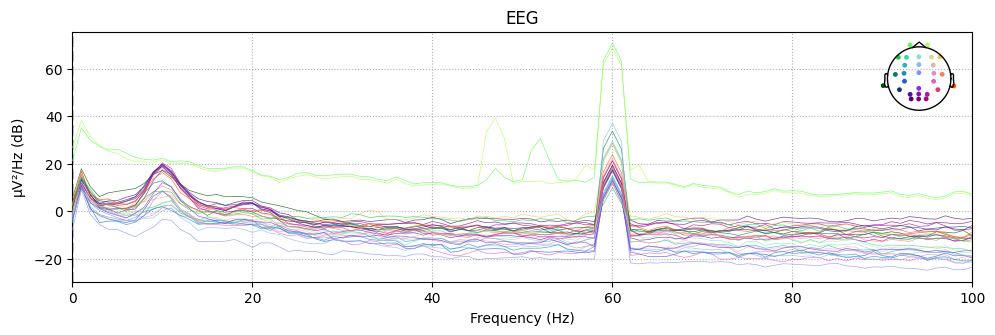

In [ ]:
# Plot PSD of the data:
loadedRaw.plot_psd(fmin=0, fmax=100)
print("Done")

### **2.2 Band-pass filtering**:

Next, we shall filter the data into the range of frequencies that brain activity is expected to occupy (1Hz - 45Hz). Notice that regions of the PSD that lie outside of this range (indicated by dotted gray lines) have been suppressed.

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 6759 samples (3.300 s)

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 1.000 (s)
Done


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.1s finished
/Users/saurabh/opt/anaconda3/envs/CNX_UXRI/lib/python3.9/site-packages/mne/viz/utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


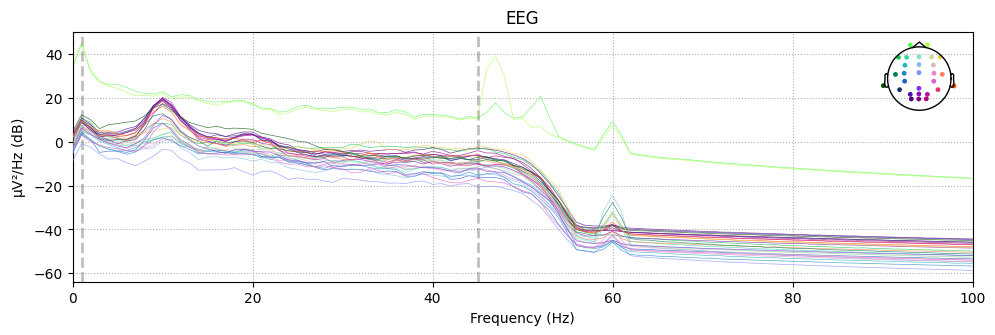

In [ ]:
loadedRaw.filter(l_freq = 1, h_freq = 45)
loadedRaw.plot_psd(fmin=0, fmax=100)
print("Done")

Here is the corresponding time-series data, showing a clear alpha oscillation at approximately 10 cycles/second, especially in the electrodes at the back of the head (PO3, POz, PO4, O1, Oz, O2). Notice that the Fp1 and Fp2 channels seem to still be noisy. These may be indicative of bad channels that were faulty or disconnected during data collection.

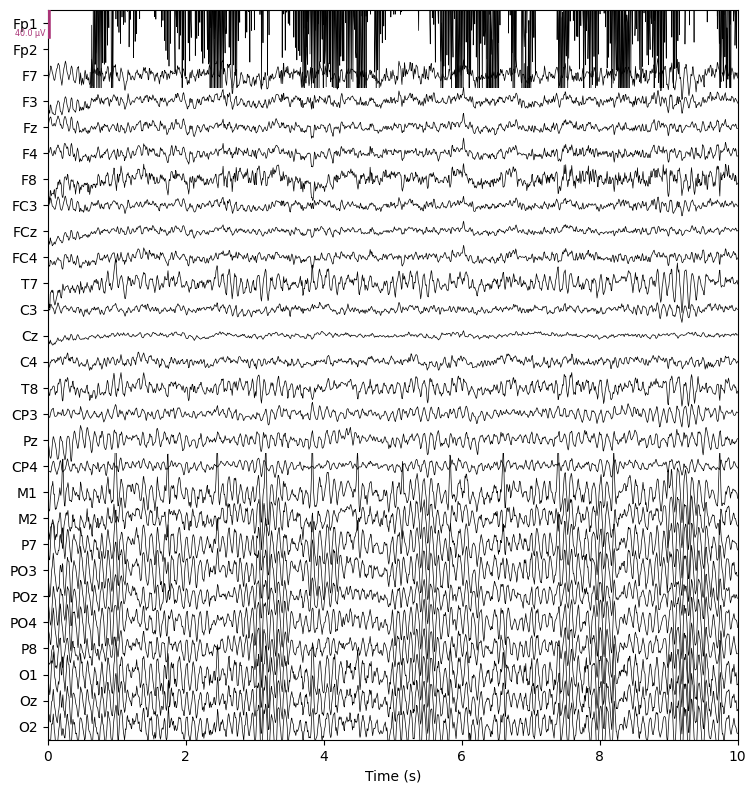

Done


In [ ]:
# Plot raw data:
loadedRaw.plot(n_channels = len(ch_toKeep), show_scrollbars=False)
print("Done")

### **2.3 Notch Filtering**:

This step is optional, especially since the previous filters adequately eliminated noise. Hence, you will see no discernable improvement in data quality.

However, if we are interested in brain acitivty with frequencies close to the line noise, we might want to perform this step to ensure that line noise has been adequately removed.



Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 13517 samples (6.600 s)

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 1.000 (s)
Done


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.1s finished
/Users/saurabh/opt/anaconda3/envs/CNX_UXRI/lib/python3.9/site-packages/mne/viz/utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


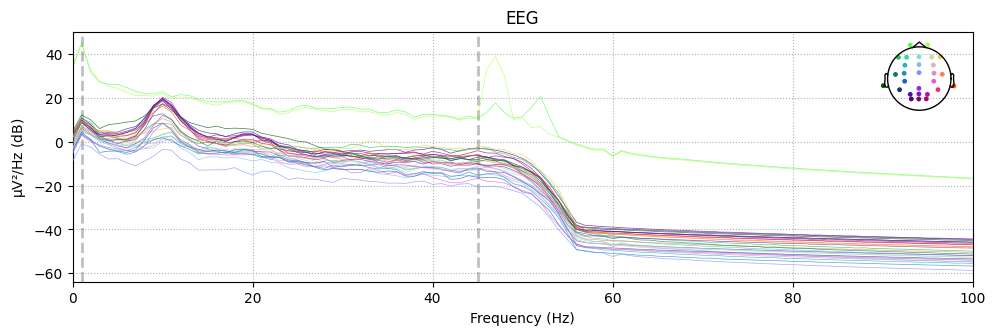

In [ ]:
# Plot PSD:
loadedRaw.notch_filter(60)
loadedRaw.plot_psd(fmin=0, fmax=100)
print("Done")

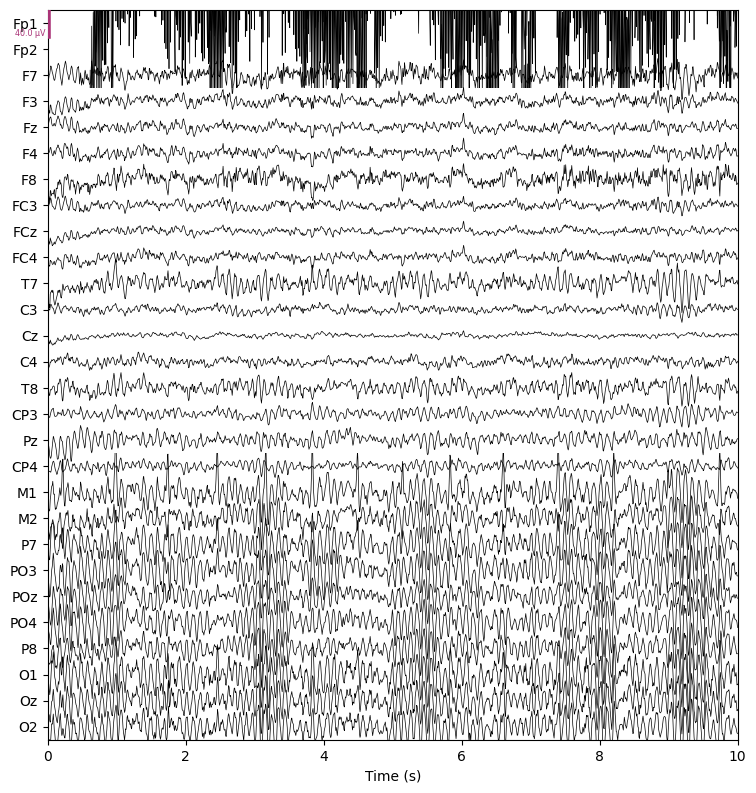

Done


In [ ]:
# Plot raw data:
loadedRaw.plot(n_channels = len(ch_toKeep), show_scrollbars=False)
print("Done")

### **2.4 Identify and label/remove bad channels**:

Next, the bad channels that have been identified as faulty, can be labeled as "bad". This is done by adding their names to the "bads" list. All subsequent analyses will now ignore these channels while performing these analyses. They will be interpolated after the other channels have been denoised.

In [ ]:
# Label the channels as bad:
loadedRaw.info["bads"].extend(["Fp1","Fp2"])
loadedRaw.info["bads"]

['Fp1', 'Fp2']

These channels are greyed out when plotting their time series

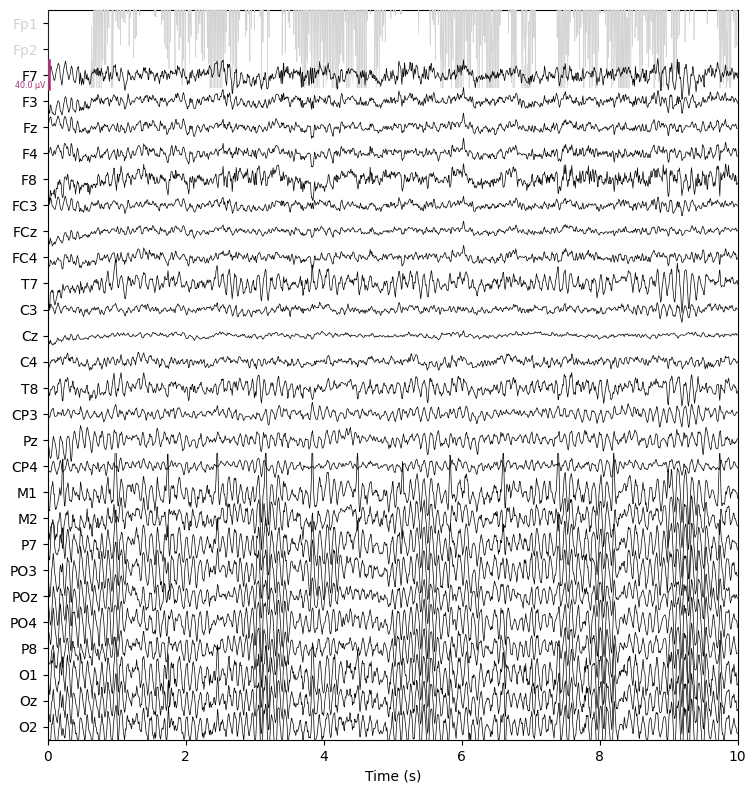

Done


In [ ]:
# Plot raw data:
loadedRaw.plot(n_channels = len(ch_toKeep), show_scrollbars=False)
print("Done")

### **2.5 ICA-based noise removal**:

ICA is used as a blind source separation (BSS) technique to separate sources of noise within the EEG data.

In [ ]:
from mne.preprocessing import ICA, create_ecg_epochs, create_eog_epochs

ica = ICA(max_iter=5000, random_state=19)
ica.fit(loadedRaw)

Fitting ICA to data using 26 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 26 components
Fitting ICA took 118.4s.


/Users/saurabh/opt/anaconda3/envs/CNX_UXRI/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


<ICA | raw data decomposition, method: fastica (fit in 5000 iterations on 67584 samples), 26 ICA components (26 PCA components available), channel types: eeg, no sources marked for exclusion>

Plotting the identified ICA components, one can clearly see that some ICA components represent the alpha oscillatory activity, while some others represent artifacts such as the periodic heartbeat. Could you identify two components that you suspect are related to periodic heartbeat?

Creating RawArray with float64 data, n_channels=26, n_times=67584
    Range : 0 ... 67583 =      0.000 ...    33.000 secs
Ready.


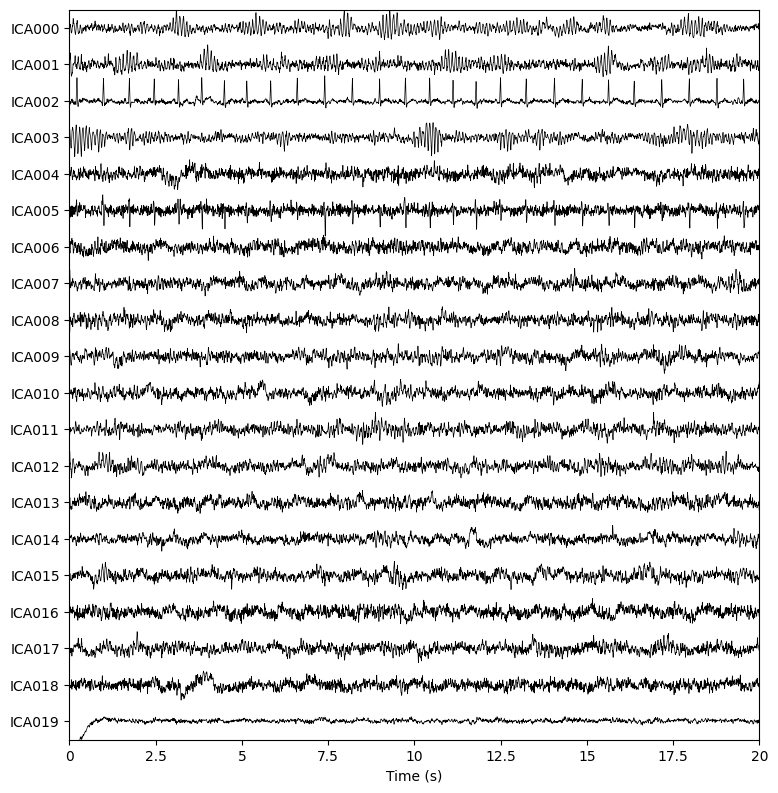

Done


In [ ]:
ica.plot_sources(loadedRaw, show_scrollbars=False)
print("Done")

The artifactual components can be viewed in more detail using the following command. These can show the spectral distribution and the scalp topology associated with the component time series above. Use this to confirm the patterns of the two artifactual components you identified above.

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
16 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
16 matching events found
No baseline correction applied
0 projection items activated


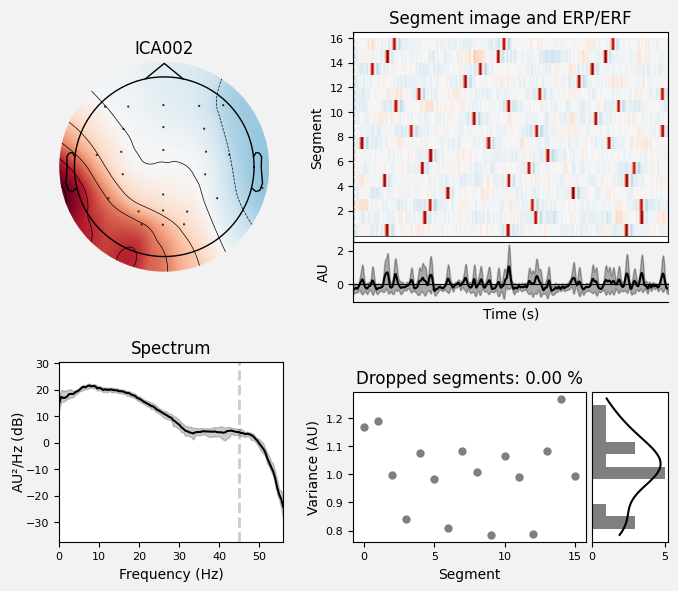

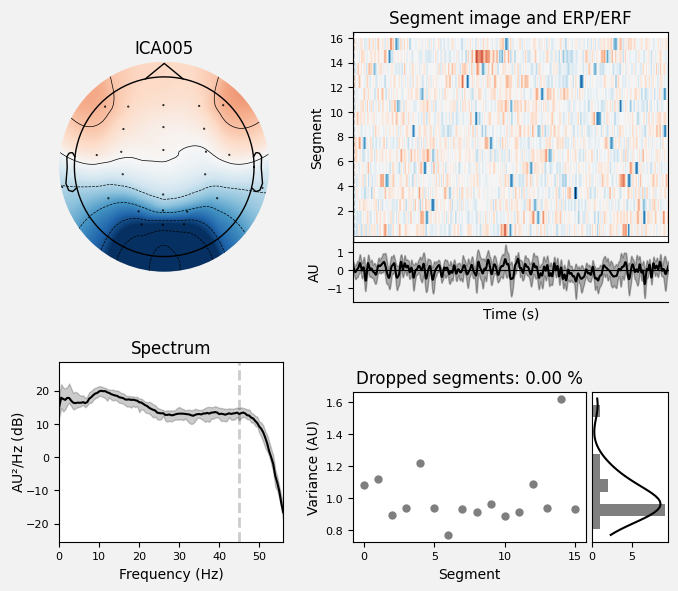

[<Figure size 700x600 with 6 Axes>, <Figure size 700x600 with 6 Axes>]

In [ ]:
artifactual_components = [2,5] # replace these with the components you suspect are artifactual
ica.plot_properties(loadedRaw, picks=artifactual_components)

Creating RawArray with float64 data, n_channels=26, n_times=67584
    Range : 0 ... 67583 =      0.000 ...    33.000 secs
Ready.


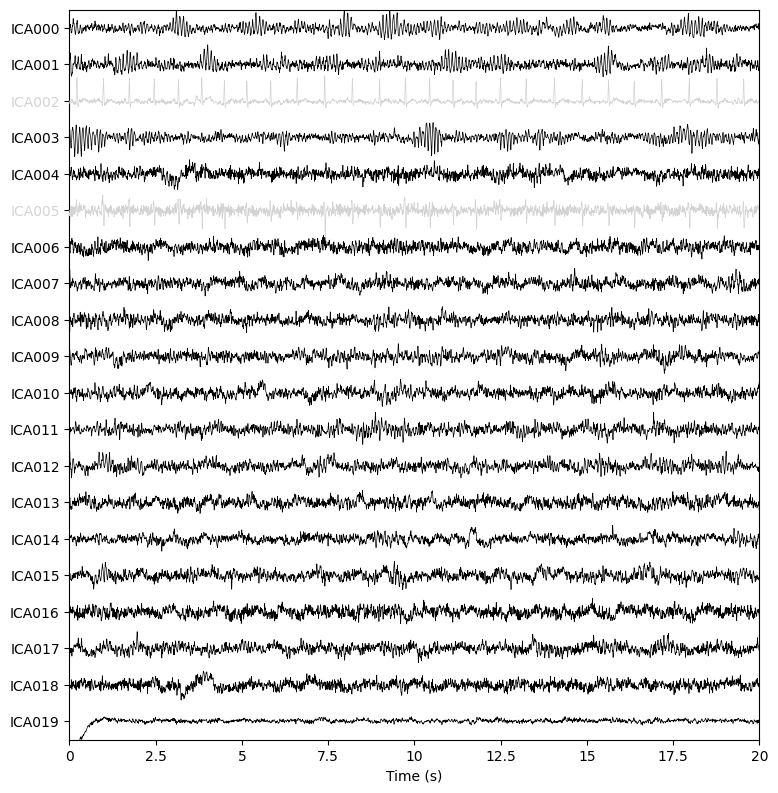

Applying ICA to Raw instance
    Transforming to ICA space (26 components)
    Zeroing out 2 ICA components
    Projecting back using 26 PCA components
Done


In [ ]:
# Reconstruct the signal after excluding the artifactual components
ica.exclude = artifactual_components
ica.plot_sources(loadedRaw, show_scrollbars=False)
ica.apply(loadedRaw)
print("Done")

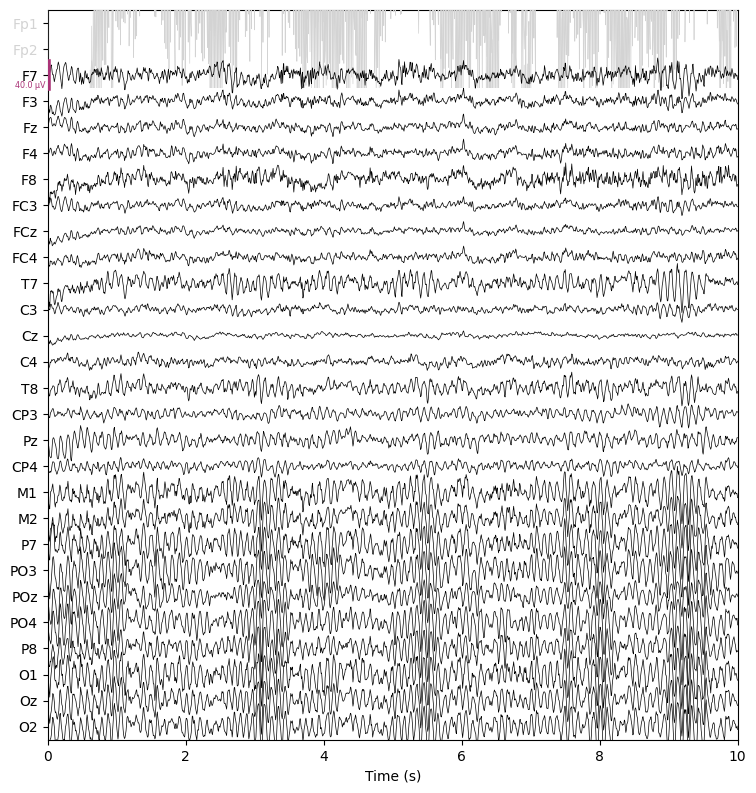

Done


In [ ]:
# Plot raw data:
loadedRaw.plot(n_channels = len(ch_toKeep), show_scrollbars=False)
print("Done")

### **2.6 Re-referencing (optional)**:

After artifactual sources of noise have been removed, the EEG data can be referenced if desired. This step should be done after sources of noise have already been removed, otherwise the noise in some channels can be introduced into all channels. For example, if we wanted to re-reference to the mastoids (M1 and M2), and had done so earlier, we would have introduced the artifactual heartbeat component found in the M1/M2 channels into all other channels. However, doing so now will not cause such an issue.

In [ ]:
rereferencedRaw = loadedRaw.copy().set_eeg_reference(ref_channels=["M1","M2"])

EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.


Notice that applying this re-referencing scheme introduced the alpha oscillatory activity across all channels, causing a loss of information on which channels predominantly represented the primary visual cortex. This is because our neural activity of interest (the alpha oscillations) are also present in the M1 and M2 channels and hence they are not a good reference candidate.

In the current scenario, the data is already appropriately referenced and further changes may not be necessary.

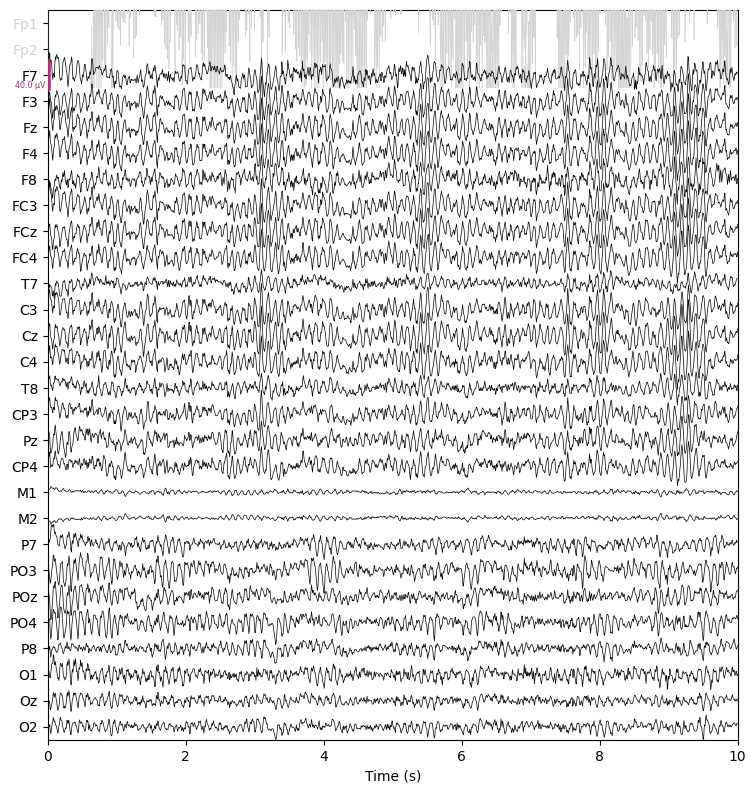

Done


In [ ]:
# Plot raw data:
rereferencedRaw.plot(n_channels = len(ch_toKeep), show_scrollbars=False)
print("Done")

### **2.7 Interpolation of bad channels**:

The bad channels identified in the beginning can now be interpolated, since most of the artifacts would have been removed from neighbouring channels.

In [ ]:
loadedRaw.interpolate_bads(reset_bads=False)


Interpolating bad channels
    Automatic origin fit: head of radius 99.0 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 2 sensors


<RawArray | 28 x 67584 (33.0 s), ~14.5 MB, data loaded>

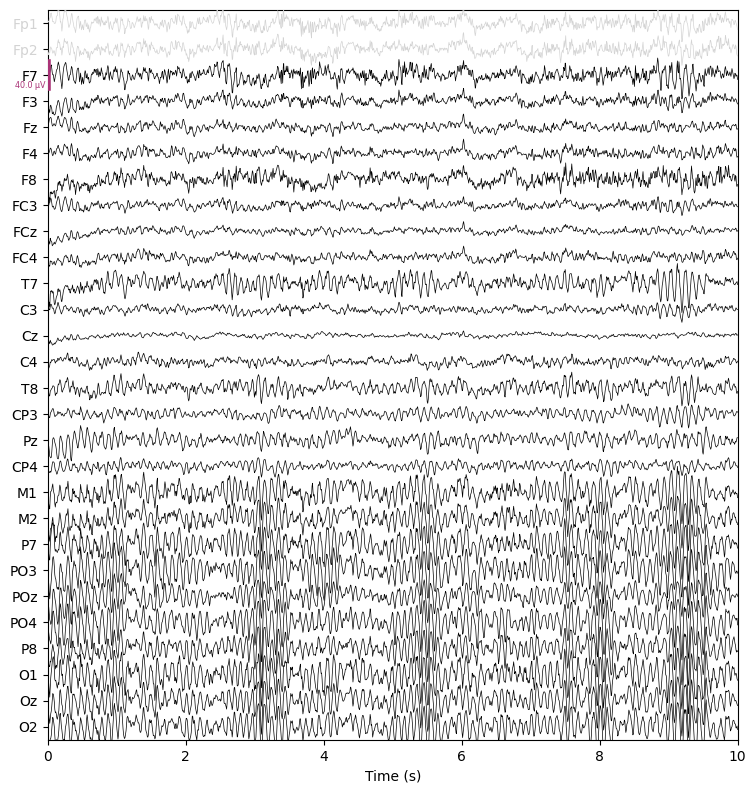

Done


In [ ]:
# Plot raw data:
loadedRaw.plot(n_channels = len(ch_toKeep), show_scrollbars=False)
print("Done")

Let us look at the PSD of the final pre-processed signal. Use this image to answer questions in the quiz found within the LMS

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 1.000 (s)
Done


/Users/saurabh/opt/anaconda3/envs/CNX_UXRI/lib/python3.9/site-packages/mne/viz/utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


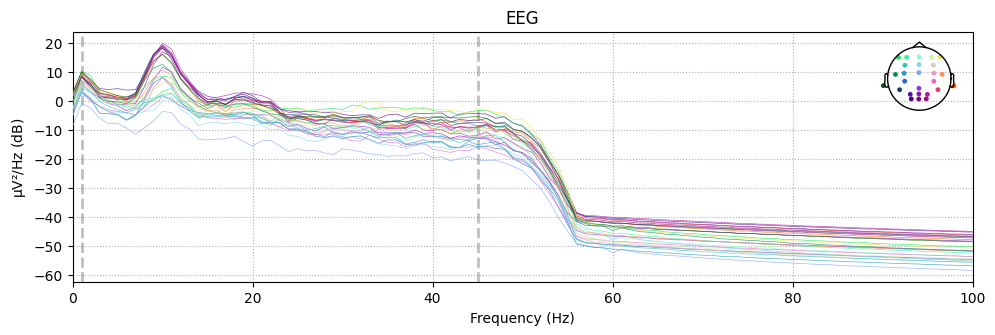

In [ ]:
loadedRaw.plot_psd(fmin=0, fmax=100)
print("Done")

Feel free to redo this analysis with the EEG dataset collected when the participant had their eyes open.

Do you see different kinds of artifacts introduced in the signal?

Do you observe an alpha peak, as you do with this dataset? Why or why not?